In [1]:
# googleドライブのマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# sys.pathの設定
import sys
sys.path.append('/content/drive/My Drive/DNN_code')

mnistデータセット

In [3]:
import numpy as np
from data.mnist import load_mnist
import pickle
from common import functions
import matplotlib.pyplot as plt


# mnistをロード
# normalize : 画像を0.0 - 1.0 に正規化
# one_hot_label : ラベルをone-hot表現に
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)
train_size = len(x_train)

print('データ読み込み完了')

# 重み初期値補正係数
weight_init = 0.01
# 入力層サイズ
input_layer_size = 784
# 中間層サイズ
hidden_layer_size = 40
# 出力層サイズ
output_layer_size = 10

# 繰り返し数
iter_num = 1000
# ミニバッチサイズ
batch_size = 100
# 学習率
learning_rate = 0.1
# 描画頻度
plot_interval = 10

# 初期設定
def init_network():
  network = {}
  network['W1'] = weight_init * np.random.randn(input_layer_size, hidden_layer_size)
  network['W2'] = weight_init * np.random.randn(hidden_layer_size, output_layer_size)
  # Xavierの初期値、Heの初期値が用いられることが多い

  # バイアスはゼロで初期化
  network['b1'] = np.zeros(hidden_layer_size)
  network['b2'] = np.zeros(output_layer_size)

  return network

# 順伝播
def forward(network, x):
  W1, W2 = network['W1'], network['W2']
  b1, b2 = network['b1'], network['b2']

  u1 = np.dot(x, W1) + b1
  z1 = functions.relu(u1)
  u2 = np.dot(z1, W2) + b2
  y = functions.softmax(u2)

  return z1, y

# 誤差逆伝播
def backward(x, d, z1, y, network):
  grad = {}

  W1, W2 = network['W1'], network['W2']
  b1, b2 = network['b1'], network['b2']

  # 出力層でのデルタ
  delta2 = functions.d_softmax_with_loss(d, y)
  # b2の勾配
  grad['b2']= np.sum(delta2, axis=0)
  # W2の勾配
  grad['W2'] = np.dot(z1.T, delta2)

  # 1層でのデルタ
  delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)
  # b1の勾配
  grad['b1'] = np.sum(delta1, axis=0)
  # W1の勾配
  grad['W1'] = np.dot(x.T, delta1)

  return grad

データ読み込み完了


In [8]:
# パラメータの初期化
network = init_network()

accuracies_train = []
accuracies_test = []

# 正答率
def accuracy(x, d):
  z1, y = forward(network, x)
  y = np.argmax(y, axis=1)
  # np.argmax()の引数にndarrayを指定すると最大値となる要素のインデックスが返される。
  if d.ndim != 1 : d = np.argmax(d, axis=1)
  accuracy = np.sum(y == d) / float(x.shape[0])
  return accuracy


Generation: 10. 正答率(トレーニング) = 0.09
                : 10. 正答率(テスト) = 0.1007
Generation: 20. 正答率(トレーニング) = 0.3
                : 20. 正答率(テスト) = 0.3053
Generation: 30. 正答率(トレーニング) = 0.15
                : 30. 正答率(テスト) = 0.2149
Generation: 40. 正答率(トレーニング) = 0.24
                : 40. 正答率(テスト) = 0.2273
Generation: 50. 正答率(トレーニング) = 0.27
                : 50. 正答率(テスト) = 0.3125
Generation: 60. 正答率(トレーニング) = 0.34
                : 60. 正答率(テスト) = 0.3964
Generation: 70. 正答率(トレーニング) = 0.37
                : 70. 正答率(テスト) = 0.4293
Generation: 80. 正答率(トレーニング) = 0.62
                : 80. 正答率(テスト) = 0.5611
Generation: 90. 正答率(トレーニング) = 0.63
                : 90. 正答率(テスト) = 0.6194
Generation: 100. 正答率(トレーニング) = 0.7
                : 100. 正答率(テスト) = 0.6953
Generation: 110. 正答率(トレーニング) = 0.7
                : 110. 正答率(テスト) = 0.7088
Generation: 120. 正答率(トレーニング) = 0.8
                : 120. 正答率(テスト) = 0.7671
Generation: 130. 正答率(トレーニング) = 0.73
                : 130. 正答率(テスト) = 0.776
Generation: 140. 正答率(ト

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27491 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 31572 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text

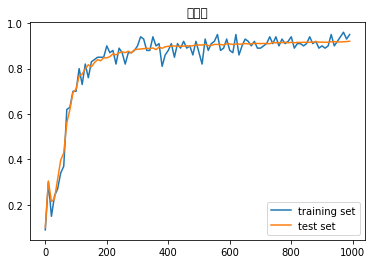

In [9]:
# 学習
for i in range(iter_num):
  # ランダムにバッチを取得
  batch_mask = np.random.choice(train_size, batch_size)
  # ミニバッチに対応する教師訓練画像データを取得
  x_batch = x_train[batch_mask]
  # ミニバッチに対応する訓練正解ラベルデータを取得
  d_batch = d_train[batch_mask]

  z1, y = forward(network, x_batch)
  grad = backward(x_batch, d_batch, z1, y, network)

  if (i+1)%plot_interval==0:
    accr_test = accuracy(x_test, d_test)
    accuracies_test.append(accr_test)

    accr_train = accuracy(x_batch, d_batch)
    accuracies_train.append(accr_train)

    print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
    print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

  # パラメータに勾配適用
  for key in ('W1', 'W2', 'b1', 'b2'):
    network[key] -= learning_rate * grad[key]

lists = range(0, iter_num, plot_interval)
plt.plot(lists, accuracies_train, label='training set')
plt.plot(lists, accuracies_test, label='test set')
plt.legend(loc='lower right')
plt.title('正答率')

plt.show()